# Ejemplo 1

In [1]:
import scipy.io as sio
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

#Leer datos acceleracion en m/s^2
Datos=sio.loadmat('Datos_clase2.mat') #Healthy
acc1=Datos['canal1'][:,0]
acc2=Datos['canal2'][:,0]
acc3=Datos['canal3'][:,0]
acc4=Datos['canal4'][:,0]
tiempo=Datos['canal5'][:,0]


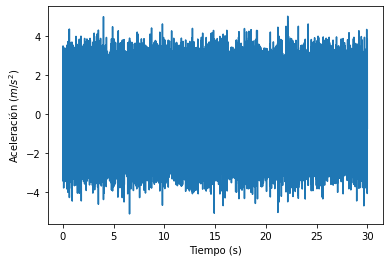

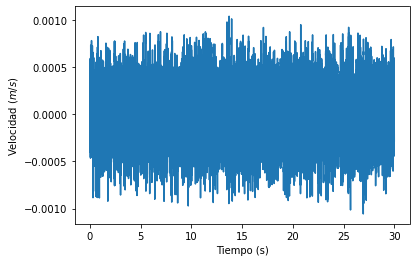

In [3]:
#calcular vibraciones en unidades de velocidad m/s
v1 = integrate.cumtrapz(acc1, tiempo)
v2 = integrate.cumtrapz(acc2, tiempo)
v3 = integrate.cumtrapz(acc3, tiempo)
v4 = integrate.cumtrapz(acc4, tiempo)

#graficar
plt.plot(tiempo, acc1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración ($m/s^2$)')
plt.show()

plt.plot(tiempo[0:len(v1)], v1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad ($m/s$)')
plt.show()


In [4]:
#calcular RMS
rms1=np.sqrt(np.mean(v1**2))*1000
rms2=np.sqrt(np.mean(v2**2))*1000
rms3=np.sqrt(np.mean(v3**2))*1000
rms4=np.sqrt(np.mean(v4**2))*1000

print('RMS1=',round(rms1,3))
print('RMS2=',round(rms2,3))
print('RMS3=',round(rms3,3))
print('RMS4=',round(rms4,3))


RMS1= 0.299
RMS2= 0.363
RMS3= 0.291
RMS4= 0.533


# Ejemplo 2

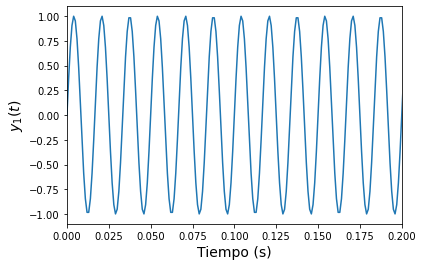

(0.0, 0.2)

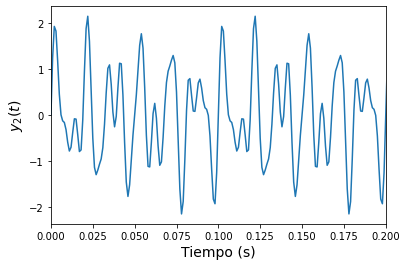

In [5]:
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

N = 2000  # Número de datos
fs= 1000  # Frecuencia de muestreo
dt = 1/fs # Espaciado
t = np.linspace(0, (N-1)*dt, N)  # Intervalo de tiempo en segundos
y1 = np.sin(2*pi *60*t) # Señal 1
y2 = np.sin(2*pi *60*t) + 0.8*np.sin(2*pi*100*t) + 0.5*np.sin(2*pi*150*t) # Señal 2

plt.plot(t, y1)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$y_1(t)$', fontsize=14)
plt.xlim(0,0.2)
plt.show()

plt.plot(t, y2)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$y_2(t)$', fontsize=14)
plt.xlim(0,0.2)


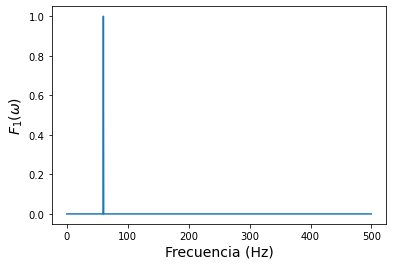

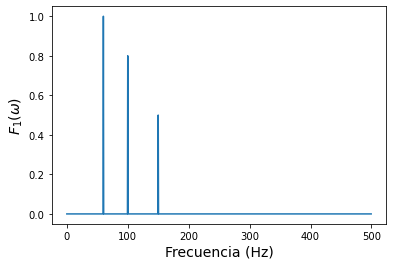

In [6]:
#Transformada de Fourier
Y1 = fft(y1)[0:int(N/2)]/(N/2)
Y2 = fft(y2)[0:int(N/2)]/(N/2)
frq = fftfreq(N,dt)[0:int(N/2)] #vector de frecuencias

plt.plot(frq,abs(Y1))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F_1(\omega)$', fontsize=14)
plt.show()

plt.plot(frq,abs(Y2))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F_1(\omega)$', fontsize=14)
plt.show()


# Ejemplo 3

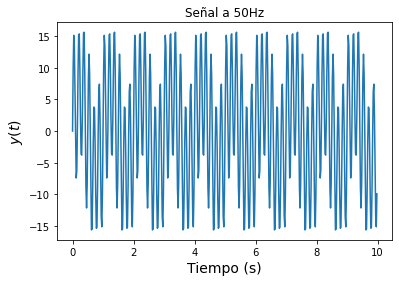

In [7]:
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

#generar señal 50 Hz
N = 500  # Número de datos
fs= 50  # Frecuencia de muestreo
dt = 1/fs # Espaciado
t = np.linspace(0, (N-1)*dt, N)  # Intervalo de tiempo en segundos
y = 6*np.sin(2*pi *1*t) + 2*np.sin(2*pi*4*t) + 12*np.sin(2*pi*6*t) # Señal

#graficar respuesta temporal
plt.plot(t, y)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14)
plt.title('Señal a 50Hz')
plt.show()


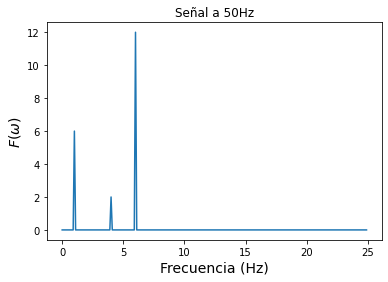

In [8]:
#Transformada de Fourier
Y = fft(y)[0:int(N/2)]/(N/2)
frq = fftfreq(N,dt)[0:int(N/2)] #vector de frecuencias

plt.plot(frq,abs(Y))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F(\omega)$', fontsize=14)
plt.title('Señal a 50Hz')
plt.show()


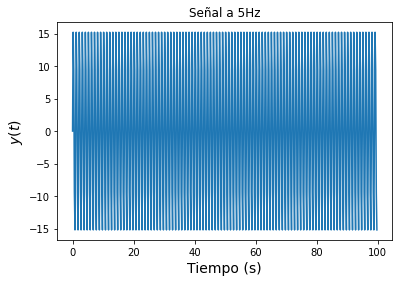

In [9]:
#generar señal 5 Hz
N = 500  # Número de datos
fs= 5  # Frecuencia de muestreo
dt = 1/fs # Espaciado
t = np.linspace(0, (N-1)*dt, N)  # Intervalo de tiempo en segundos
y = 6*np.sin(2*pi *1*t) + 2*np.sin(2*pi*4*t) + 12*np.sin(2*pi*6*t) # Señal

#graficar respuesta temporal
plt.plot(t, y)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14)
plt.title('Señal a 5Hz')
plt.show()


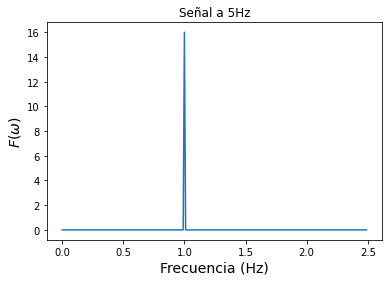

In [10]:
#Transformada de Fourier
Y = fft(y)[0:int(N/2)]/(N/2)
frq = fftfreq(N,dt)[0:int(N/2)] #vector de frecuencias

plt.plot(frq,abs(Y))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$F(\omega)$', fontsize=14)
plt.title('Señal a 5Hz')
plt.show()


# Ejemplo 4

In [11]:
import scipy.io as sio
from scipy import signal
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np
import math

#Leer datos acceleracion en m/s^2
a=Datos['canal1'][:,0]
t=Datos['canal5'][:,0]

#dividir señal
L=5000 #largo de los segmentos
l=2500 #overlap 50%
N=len(a) 
Ns=math.floor((N-l)/(L-l))

Ep=np.zeros((int(L/2),))


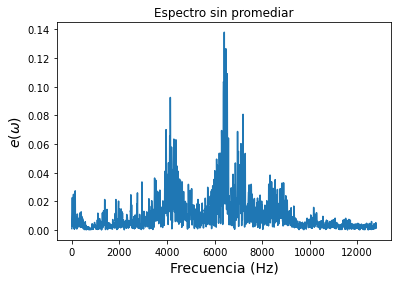

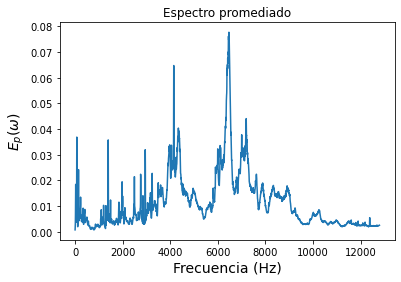

In [12]:
for i in range(1,Ns+1):
    inicio=(i-1)*L-(i-1)*l
    fin=i*L-(i-1)*l
    window = signal.windows.hann(L)
    av=a[inicio:fin]*window #segmento de datos con ventana
    e = fft(av)[0:int(L/2)]/(L/2)
    Ep=Ep+abs(e)/Ns

dt=t[1]-t[0]    
frq = fftfreq(L,dt)[0:int(L/2)]

plt.plot(frq,abs(e))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$e(\omega)$', fontsize=14)
plt.title('Espectro sin promediar')
plt.show()

plt.plot(frq,Ep)
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('$E_p(\omega)$', fontsize=14)
plt.title('Espectro promediado')
plt.show()
